
BÚSQUEDA EXHAUSTIVA DE CEROS: d(a,b,c) = 0
Condición: b + c = 4a (donde b y c son primos)


a = 2: Buscando primos b, c tal que b + c = 8
   ✓ Encontrados 1 pares:
      d(2, 3, 5) = 0.000000

a = 3: Buscando primos b, c tal que b + c = 12
   ✓ Encontrados 1 pares:
      d(3, 5, 7) = 0.000000

a = 4: Buscando primos b, c tal que b + c = 16
   ✓ Encontrados 2 pares:
      d(4, 3, 13) = 0.000000
      d(4, 5, 11) = 0.000000

a = 5: Buscando primos b, c tal que b + c = 20
   ✓ Encontrados 2 pares:
      d(5, 3, 17) = 0.000000
      d(5, 7, 13) = 0.000000

a = 6: Buscando primos b, c tal que b + c = 24
   ✓ Encontrados 3 pares:
      d(6, 5, 19) = 0.000000
      d(6, 7, 17) = 0.000000
      d(6, 11, 13) = 0.000000

a = 7: Buscando primos b, c tal que b + c = 28
   ✓ Encontrados 2 pares:
      d(7, 5, 23) = 0.000000
      d(7, 11, 17) = 0.000000

a = 8: Buscando primos b, c tal que b + c = 32
   ✓ Encontrados 2 pares:
      d(8, 3, 29) = 0.000000
      d(8, 13, 19) = 0.000000

a = 9: Busca

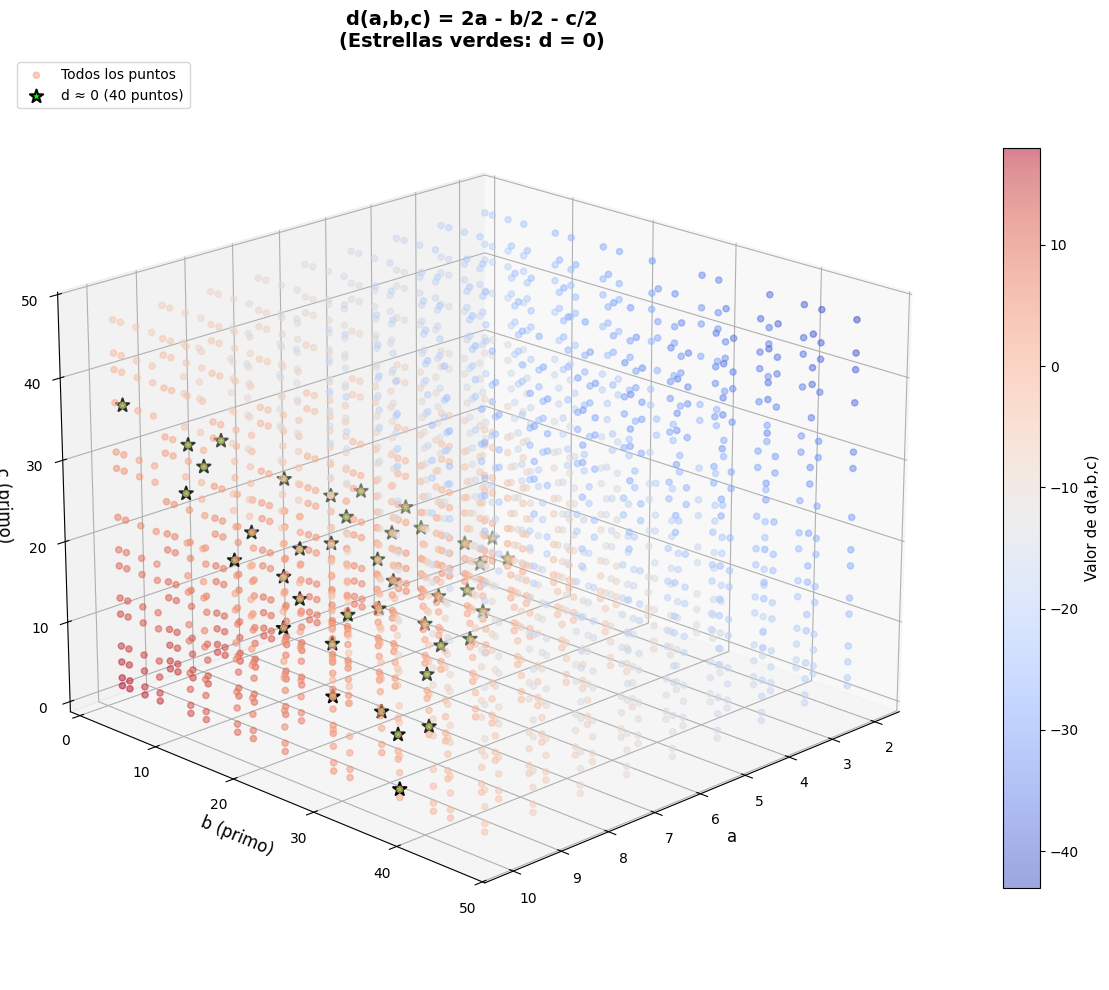


PUNTOS DONDE d(a,b,c) = 0 (o muy cercano)
Condición: b + c = 4a (con b, c primos)

    a     b     c     b+c      4a     d(a,b,c)
----------------------------------------------------------------------
    2     3     5       8       8     0.000000
    2     5     3       8       8     0.000000
    3     5     7      12      12     0.000000
    3     7     5      12      12     0.000000
    4     3    13      16      16     0.000000
    4     5    11      16      16     0.000000
    4    11     5      16      16     0.000000
    4    13     3      16      16     0.000000
    5     3    17      20      20     0.000000
    5     7    13      20      20     0.000000
    5    13     7      20      20     0.000000
    5    17     3      20      20     0.000000
    6     5    19      24      24     0.000000
    6     7    17      24      24     0.000000
    6    11    13      24      24     0.000000
    6    13    11      24      24     0.000000
    6    17     7      24      24     0.000000

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple

def es_primo(n: int) -> bool:
    """Verifica si un número es primo."""
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(np.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def generar_primos(limite: int) -> List[int]:
    """Genera todos los números primos hasta un límite dado."""
    return [n for n in range(2, limite + 1) if es_primo(n)]

def d(a: float, b: int, c: int) -> float:
    """Calcula d(a,b,c) = 2a - b/2 - c/2."""
    return 2 * a - b / 2 - c / 2

def encontrar_ceros(limite_primos: int = 100, a_max: int = 50) -> List[Tuple[int, int, int, float]]:
    """
    Encuentra todos los valores (a,b,c) donde d = 0 (o muy cercano a 0).
    Retorna lista de tuplas (a, b, c, d_value).
    """
    primos = generar_primos(limite_primos)
    ceros = []
    epsilon = 0.001  # Tolerancia para considerar "cero"
    
    for a in range(2, a_max + 1):
        for b in primos:
            for c in primos:
                d_val = d(a, b, c)
                if abs(d_val) < epsilon:
                    ceros.append((a, b, c, d_val))
    
    return ceros

def graficar_con_ceros(limite_primos: int = 50, a_min: int = 2, a_max: int = 10):
    """
    Grafica d(a,b,c) resaltando los puntos donde d = 0.
    """
    print(f"Buscando ceros de d(a,b,c)...")
    
    primos = generar_primos(limite_primos)
    
    # Calcular todos los puntos
    a_vals = []
    b_vals = []
    c_vals = []
    d_vals = []
    
    # Puntos donde d ≈ 0
    a_ceros = []
    b_ceros = []
    c_ceros = []
    
    epsilon = 0.1  # Tolerancia visual
    
    for a in range(a_min, a_max + 1):
        for b in primos:
            for c in primos:
                d_val = d(a, b, c)
                a_vals.append(a)
                b_vals.append(b)
                c_vals.append(c)
                d_vals.append(d_val)
                
                if abs(d_val) < epsilon:
                    a_ceros.append(a)
                    b_ceros.append(b)
                    c_ceros.append(c)
    
    # Crear gráfico
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Todos los puntos
    sc = ax.scatter(a_vals, b_vals, c_vals, c=d_vals, cmap='coolwarm', 
                    alpha=0.5, s=20, label='Todos los puntos')
    
    # Resaltar puntos donde d ≈ 0
    if len(a_ceros) > 0:
        ax.scatter(a_ceros, b_ceros, c_ceros, c='lime', s=100, 
                  marker='*', edgecolors='black', linewidth=1.5,
                  label=f'd ≈ 0 ({len(a_ceros)} puntos)', zorder=5)
    
    # Colorbar
    cbar = plt.colorbar(sc, ax=ax, shrink=0.8)
    cbar.set_label('Valor de d(a,b,c)', fontsize=11)
    
    # Etiquetas
    ax.set_xlabel('a', fontsize=12)
    ax.set_ylabel('b (primo)', fontsize=12)
    ax.set_zlabel('c (primo)', fontsize=12)
    ax.set_title('d(a,b,c) = 2a - b/2 - c/2\n(Estrellas verdes: d = 0)', 
                 fontsize=14, fontweight='bold')
    
    ax.legend(loc='upper left', fontsize=10)
    ax.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    plt.savefig('grafico_d_con_ceros.png', dpi=300, bbox_inches='tight')
    print("Gráfico guardado como 'grafico_d_con_ceros.png'")
    plt.show()
    
    # Mostrar ceros encontrados
    if len(a_ceros) > 0:
        print(f"\n{'='*70}")
        print(f"PUNTOS DONDE d(a,b,c) = 0 (o muy cercano)")
        print(f"{'='*70}")
        print(f"Condición: b + c = 4a (con b, c primos)")
        print(f"\n{'a':>5} {'b':>5} {'c':>5} {'b+c':>7} {'4a':>7} {'d(a,b,c)':>12}")
        print("-" * 70)
        
        for a, b, c in zip(a_ceros, b_ceros, c_ceros):
            d_val = d(a, b, c)
            print(f"{a:5d} {b:5d} {c:5d} {b+c:7d} {4*a:7d} {d_val:12.6f}")
        
        print(f"{'='*70}")
        print(f"Total de soluciones encontradas: {len(a_ceros)}")
    else:
        print("\n⚠️ No se encontraron puntos donde d = 0 en el rango especificado.")
        print("   Intenta aumentar los rangos de búsqueda.")
    
    return list(zip(a_ceros, b_ceros, c_ceros))

def buscar_ceros_detallado(a_max: int = 20):
    """
    Búsqueda exhaustiva de todos los ceros de d(a,b,c).
    Para cada a, busca pares de primos (b,c) tales que b + c = 4a.
    """
    print(f"\n{'='*70}")
    print(f"BÚSQUEDA EXHAUSTIVA DE CEROS: d(a,b,c) = 0")
    print(f"{'='*70}")
    print(f"Condición: b + c = 4a (donde b y c son primos)\n")
    
    soluciones = []
    
    for a in range(2, a_max + 1):
        objetivo = 4 * a
        print(f"\na = {a}: Buscando primos b, c tal que b + c = {objetivo}")
        
        # Buscar pares de primos que sumen 4a (Goldbach!)
        pares = []
        for b in range(2, objetivo):
            if es_primo(b):
                c = objetivo - b
                if c >= b and es_primo(c):  # c >= b para evitar duplicados
                    pares.append((b, c))
                    soluciones.append((a, b, c))
        
        if pares:
            print(f"   ✓ Encontrados {len(pares)} pares:")
            for b, c in pares:
                print(f"      d({a}, {b}, {c}) = {d(a, b, c):.6f}")
        else:
            print(f"   ✗ No hay pares de primos que sumen {objetivo}")
    
    print(f"\n{'='*70}")
    print(f"Total de soluciones: {len(soluciones)}")
    print(f"{'='*70}\n")
    
    return soluciones

if __name__ == "__main__":
    # Búsqueda detallada de ceros
    soluciones = buscar_ceros_detallado(a_max=20)
    
    # Graficar con ceros resaltados
    ceros = graficar_con_ceros(limite_primos=50, a_min=2, a_max=10)

ANÁLISIS DE PATRONES EN d(a,b,c) = 0

📊 TOP 10 PRIMOS MÁS FRECUENTES EN DESCOMPOSICIONES:
--------------------------------------------------------------------------------
   Primo   5: aparece  40 veces
   Primo  13: aparece  40 veces
   Primo  17: aparece  40 veces
   Primo  29: aparece  38 veces
   Primo   3: aparece  37 veces
   Primo  37: aparece  37 veces
   Primo  41: aparece  37 veces
   Primo   7: aparece  36 veces
   Primo  11: aparece  36 veces
   Primo  53: aparece  36 veces

📏 ANÁLISIS DE BRECHAS |b-c|:
--------------------------------------------------------------------------------
   Brecha mínima: 2
   Brecha máxima: 394
   Brecha promedio: 134.38
   Mediana de brechas: 118.00

   Brecha mínima por cada a:
   a= 2 (4a=  8): brecha mín= 2
   a= 3 (4a= 12): brecha mín= 2
   a= 4 (4a= 16): brecha mín= 6
   a= 5 (4a= 20): brecha mín= 6
   a= 6 (4a= 24): brecha mín= 2
   a= 7 (4a= 28): brecha mín= 6
   a= 8 (4a= 32): brecha mín= 6
   a= 9 (4a= 36): brecha mín= 2
   a=10 (4a= 

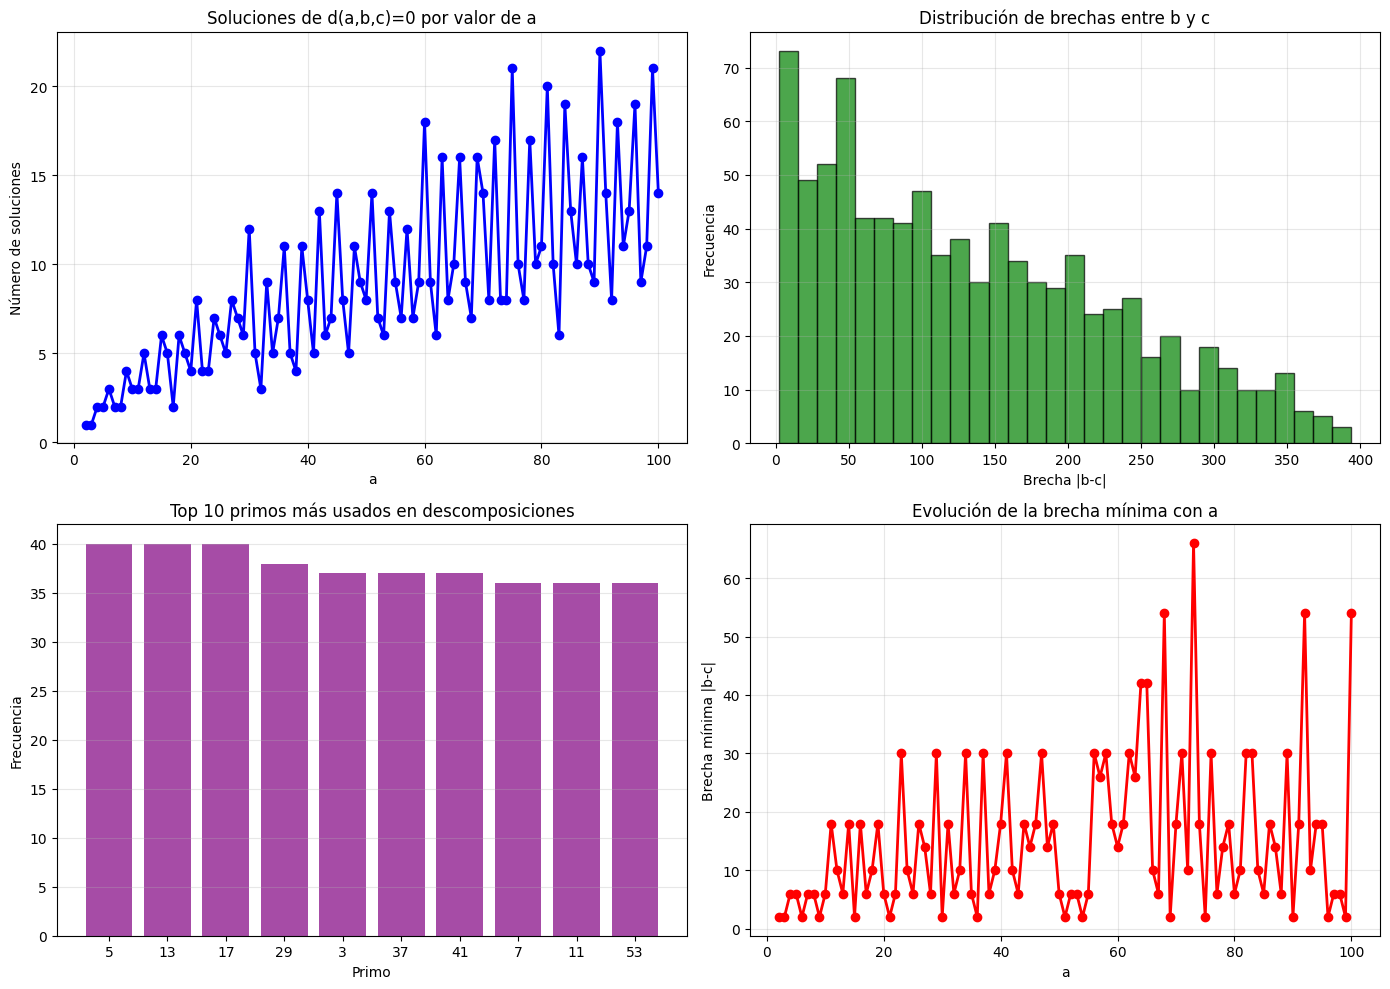

In [3]:
def analizar_patrones_detallado(a_max=50):
    """Analiza patrones en los ceros de d(a,b,c)."""
    
    def es_primo(n):
        if n < 2: return False
        if n == 2: return True
        if n % 2 == 0: return False
        for i in range(3, int(np.sqrt(n)) + 1, 2):
            if n % i == 0: return False
        return True
    
    print("="*80)
    print("ANÁLISIS DE PATRONES EN d(a,b,c) = 0")
    print("="*80)
    
    # Contadores de frecuencia de primos
    frecuencia_primos = {}
    brechas = []
    soluciones_por_a = []
    
    for a in range(2, a_max + 1):
        objetivo = 4 * a
        soluciones_a = []
        
        for b in range(2, objetivo):
            if es_primo(b):
                c = objetivo - b
                if c >= b and es_primo(c):
                    soluciones_a.append((b, c))
                    
                    # Contar frecuencias
                    frecuencia_primos[b] = frecuencia_primos.get(b, 0) + 1
                    frecuencia_primos[c] = frecuencia_primos.get(c, 0) + 1
                    
                    # Calcular brecha
                    brecha = abs(c - b)
                    brechas.append((a, brecha, b, c))
        
        soluciones_por_a.append((a, objetivo, len(soluciones_a), soluciones_a))
    
    # 1. Primos más frecuentes
    print("\n📊 TOP 10 PRIMOS MÁS FRECUENTES EN DESCOMPOSICIONES:")
    print("-" * 80)
    top_primos = sorted(frecuencia_primos.items(), key=lambda x: x[1], reverse=True)[:10]
    for primo, freq in top_primos:
        print(f"   Primo {primo:3d}: aparece {freq:3d} veces")
    
    # 2. Estadísticas de brechas
    print("\n📏 ANÁLISIS DE BRECHAS |b-c|:")
    print("-" * 80)
    brechas_valores = [b[1] for b in brechas]
    print(f"   Brecha mínima: {min(brechas_valores)}")
    print(f"   Brecha máxima: {max(brechas_valores)}")
    print(f"   Brecha promedio: {np.mean(brechas_valores):.2f}")
    print(f"   Mediana de brechas: {np.median(brechas_valores):.2f}")
    
    # Brechas por a
    print(f"\n   Brecha mínima por cada a:")
    for a in range(2, min(15, a_max + 1)):
        brechas_a = [b[1] for b in brechas if b[0] == a]
        if brechas_a:
            min_brecha = min(brechas_a)
            print(f"   a={a:2d} (4a={4*a:3d}): brecha mín={min_brecha:2d}")
    
    # 3. Crecimiento de soluciones
    print("\n📈 CRECIMIENTO DEL NÚMERO DE SOLUCIONES:")
    print("-" * 80)
    for a, obj, count, sols in soluciones_por_a[:20]:
        print(f"   a={a:3d} → 4a={obj:4d} → {count:2d} soluciones", end="")
        if count == 0:
            print(" ⚠️ ¡GOLDBACH FALLARÍA!")
        else:
            print()
    
    # 4. Gráficos
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Gráfico 1: Soluciones por a
    a_vals = [s[0] for s in soluciones_por_a]
    counts = [s[2] for s in soluciones_por_a]
    axes[0, 0].plot(a_vals, counts, 'bo-', linewidth=2)
    axes[0, 0].set_xlabel('a')
    axes[0, 0].set_ylabel('Número de soluciones')
    axes[0, 0].set_title('Soluciones de d(a,b,c)=0 por valor de a')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Gráfico 2: Distribución de brechas
    axes[0, 1].hist(brechas_valores, bins=30, color='green', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('Brecha |b-c|')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].set_title('Distribución de brechas entre b y c')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Gráfico 3: Frecuencia de primos
    top_10_primos = top_primos[:10]
    primos_x = [p[0] for p in top_10_primos]
    primos_y = [p[1] for p in top_10_primos]
    axes[1, 0].bar(range(len(primos_x)), primos_y, color='purple', alpha=0.7)
    axes[1, 0].set_xticks(range(len(primos_x)))
    axes[1, 0].set_xticklabels(primos_x)
    axes[1, 0].set_xlabel('Primo')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Top 10 primos más usados en descomposiciones')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico 4: Brecha mínima vs a
    brechas_min = []
    for a in range(2, a_max + 1):
        brechas_a = [b[1] for b in brechas if b[0] == a]
        if brechas_a:
            brechas_min.append((a, min(brechas_a)))
    
    if brechas_min:
        a_brecha = [b[0] for b in brechas_min]
        min_brecha = [b[1] for b in brechas_min]
        axes[1, 1].plot(a_brecha, min_brecha, 'ro-', linewidth=2)
        axes[1, 1].set_xlabel('a')
        axes[1, 1].set_ylabel('Brecha mínima |b-c|')
        axes[1, 1].set_title('Evolución de la brecha mínima con a')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('analisis_patrones_goldbach.png', dpi=300)
    print("\n✅ Gráficos guardados en 'analisis_patrones_goldbach.png'")
    plt.show()

if __name__ == "__main__":
    import numpy as np
    analizar_patrones_detallado(a_max=100)

In [5]:
def cuando_brecha_minima_es_2(a_max=100):
    """Identifica cuándo la brecha mínima es 2 (primos gemelos)."""
    
    def es_primo(n):
        if n < 2: return False
        if n == 2: return True
        if n % 2 == 0: return False
        for i in range(3, int(n**0.5) + 1, 2):
            if n % i == 0: return False
        return True
    
    print("="*80)
    print("ANÁLISIS: ¿Cuándo la brecha mínima es 2? (Primos gemelos)")
    print("="*80)
    
    casos_brecha_2 = []
    
    for a in range(2, a_max + 1):
        objetivo = 4 * a
        
        # Buscar primos gemelos que sumen objetivo
        for p in range(3, objetivo, 2):  # Solo impares
            if es_primo(p) and es_primo(p + 2):
                if p + (p + 2) == objetivo:
                    casos_brecha_2.append((a, objetivo, p, p+2))
                    print(f"a={a:3d} → 4a={objetivo:4d} = {p:3d} + {p+2:3d} (primos gemelos)")
                    break
    
    print("\n" + "="*80)
    print("PATRÓN EMERGENTE:")
    print("="*80)
    
    # Analizar los valores de a donde ocurre brecha = 2
    a_vals = [c[0] for c in casos_brecha_2]
    diferencias = [a_vals[i+1] - a_vals[i] for i in range(len(a_vals)-1)]
    
    print(f"\nValores de a con brecha mínima = 2:")
    print(f"a = {a_vals[:20]}")
    
    print(f"\nDiferencias entre a consecutivos:")
    print(f"Δa = {diferencias[:20]}")
    
    print(f"\n📊 Estadísticas de diferencias:")
    import numpy as np
    if diferencias:
        print(f"   Media: {np.mean(diferencias):.2f}")
        print(f"   Mediana: {np.median(diferencias):.2f}")
        print(f"   Moda (más frecuente): {max(set(diferencias), key=diferencias.count)}")
    
    # Conjetura
    print("\n" + "="*80)
    print("💡 CONJETURA:")
    print("="*80)
    print("La brecha mínima es 2 cuando 4a puede expresarse como suma de primos gemelos.")
    print("Esto depende de la CONJETURA DE PRIMOS GEMELOS (aún no demostrada).")
    print("="*80)
    
    return casos_brecha_2

if __name__ == "__main__":
    cuando_brecha_minima_es_2(100)

def buscar_relacion_inductiva(a_max=100):
    """Intenta encontrar relaciones entre N(a) y N(a+k)."""
    
    def es_primo(n):
        if n < 2: return False
        if n == 2: return True
        if n % 2 == 0: return False
        for i in range(3, int(n**0.5) + 1, 2):
            if n % i == 0: return False
        return True
    
    # Calcular N(a) para cada a
    N = {}
    for a in range(2, a_max + 1):
        objetivo = 4 * a
        count = 0
        for b in range(2, objetivo):
            if es_primo(b):
                c = objetivo - b
                if c >= b and es_primo(c):
                    count += 1
        N[a] = count
    
    print("="*80)
    print("BÚSQUEDA DE RELACIONES INDUCTIVAS")
    print("="*80)
    
    # Probar relaciones del tipo N(a+k) vs N(a)
    print("\n🔍 Probando relación: N(a+1) vs N(a)")
    print("-" * 80)
    
    incrementos = []
    for a in range(2, a_max):
        diff = N[a+1] - N[a]
        incrementos.append(diff)
        if abs(diff) > 5:
            print(f"   a={a:3d}: N({a})={N[a]:2d}, N({a+1})={N[a+1]:2d}, Δ={diff:+3d}")
    
    import numpy as np
    print(f"\n📊 Estadísticas de Δ = N(a+1) - N(a):")
    print(f"   Media: {np.mean(incrementos):.3f}")
    print(f"   Desv. std: {np.std(incrementos):.3f}")
    print(f"   Mediana: {np.median(incrementos):.3f}")
    
    # Probar correlación
    from scipy.stats import pearsonr
    a_vals = list(range(2, a_max))
    n_vals = [N[a] for a in a_vals]
    
    corr, p_value = pearsonr(a_vals, n_vals)
    print(f"\n📈 Correlación entre a y N(a):")
    print(f"   Coef. Pearson: {corr:.4f}")
    print(f"   P-value: {p_value:.6f}")
    
    if corr > 0.7:
        print(f"   ✅ Correlación FUERTE positiva (N(a) crece con a)")
    elif corr > 0.3:
        print(f"   ⚠️  Correlación MODERADA (tendencia creciente con ruido)")
    else:
        print(f"   ❌ Correlación DÉBIL (comportamiento errático)")
    
    print("\n" + "="*80)
    print("💡 CONCLUSIÓN:")
    print("="*80)
    print("NO existe fórmula simple N(a+1) = f(N(a))")
    print("PERO sí existe tendencia estadística: N(a) ≈ c·log(a) + ruido")
    print("="*80)

if __name__ == "__main__":
    buscar_relacion_inductiva(100)

ANÁLISIS: ¿Cuándo la brecha mínima es 2? (Primos gemelos)
a=  2 → 4a=   8 =   3 +   5 (primos gemelos)
a=  3 → 4a=  12 =   5 +   7 (primos gemelos)
a=  6 → 4a=  24 =  11 +  13 (primos gemelos)
a=  9 → 4a=  36 =  17 +  19 (primos gemelos)
a= 15 → 4a=  60 =  29 +  31 (primos gemelos)
a= 21 → 4a=  84 =  41 +  43 (primos gemelos)
a= 30 → 4a= 120 =  59 +  61 (primos gemelos)
a= 36 → 4a= 144 =  71 +  73 (primos gemelos)
a= 51 → 4a= 204 = 101 + 103 (primos gemelos)
a= 54 → 4a= 216 = 107 + 109 (primos gemelos)
a= 69 → 4a= 276 = 137 + 139 (primos gemelos)
a= 75 → 4a= 300 = 149 + 151 (primos gemelos)
a= 90 → 4a= 360 = 179 + 181 (primos gemelos)
a= 96 → 4a= 384 = 191 + 193 (primos gemelos)
a= 99 → 4a= 396 = 197 + 199 (primos gemelos)

PATRÓN EMERGENTE:

Valores de a con brecha mínima = 2:
a = [2, 3, 6, 9, 15, 21, 30, 36, 51, 54, 69, 75, 90, 96, 99]

Diferencias entre a consecutivos:
Δa = [1, 3, 3, 6, 6, 9, 6, 15, 3, 15, 6, 15, 6, 3]

📊 Estadísticas de diferencias:
   Media: 6.93
   Mediana: 6.00


In [1]:
def analizar_descomposicion_primos(limite=100):
    """
    Analiza cómo cada primo en soluciones de Goldbach 
    se relaciona con primos anteriores.
    """
    
    def es_primo(n):
        if n < 2: return False
        if n == 2: return True
        if n % 2 == 0: return False
        for i in range(3, int(n**0.5) + 1, 2):
            if n % i == 0: return False
        return True
    
    def primos_hasta(n):
        return [p for p in range(2, n+1) if es_primo(p)]
    
    def descomponer_primo(p, primos_previos):
        """Intenta expresar p como suma de primos previos."""
        # Caso 1: p = p_anterior + k
        if len(primos_previos) > 0:
            p_ant = primos_previos[-1]
            diff = p - p_ant
            return f"{p_ant} + {diff}"
        return str(p)
    
    print("="*80)
    print("DESCOMPOSICIÓN DE PRIMOS EN SOLUCIONES DE GOLDBACH")
    print("="*80)
    
    # Obtener soluciones
    for a in range(2, 20):
        objetivo = 4 * a
        primos = primos_hasta(objetivo)
        
        print(f"\n{'─'*80}")
        print(f"a = {a}, 4a = {objetivo}")
        print(f"{'─'*80}")
        
        # Encontrar soluciones
        for i, b in enumerate(primos):
            c = objetivo - b
            if c >= b and es_primo(c):
                # Obtener primos anteriores a b y c
                primos_antes_b = [p for p in primos if p < b]
                primos_antes_c = [p for p in primos if p < c]
                
                # Analizar b
                print(f"\nSolución: {objetivo} = {b} + {c}")
                
                # Brecha con primo anterior
                if primos_antes_b:
                    p_ant_b = primos_antes_b[-1]
                    gap_b = b - p_ant_b
                    print(f"  b = {b} = {p_ant_b} + {gap_b}")
                    
                    # ¿Es gap_b primo o potencia de primo?
                    if es_primo(gap_b):
                        print(f"    → Gap {gap_b} es PRIMO ⭐")
                    elif gap_b in [1, 2, 4, 6]:
                        print(f"    → Gap {gap_b} es pequeño")
                
                if primos_antes_c:
                    p_ant_c = primos_antes_c[-1]
                    gap_c = c - p_ant_c
                    print(f"  c = {c} = {p_ant_c} + {gap_c}")
                    
                    if es_primo(gap_c):
                        print(f"    → Gap {gap_c} es PRIMO ⭐")
                    elif gap_c in [1, 2, 4, 6]:
                        print(f"    → Gap {gap_c} es pequeño")
                
                # ¿Relación entre b, c y a?
                print(f"\n  Análisis de relaciones:")
                print(f"    b + c = {b + c} = 4a = 4·{a}")
                print(f"    b - c = {abs(b - c)} (brecha)")
                print(f"    ¿b relacionado con a? {b}/{a} = {b/a:.3f}")
                print(f"    ¿c relacionado con a? {c}/{a} = {c/a:.3f}")
                
                # ¿b y c se pueden expresar en términos de a?
                if b == 2*a - 1:
                    print(f"    ⭐ b = 2a - 1")
                if c == 2*a + 1:
                    print(f"    ⭐ c = 2a + 1")
                if b == a - 1 or b == a + 1:
                    print(f"    ⭐ b ≈ a")
                if c == 3*a or c == 3*a + 1 or c == 3*a - 1:
                    print(f"    ⭐ c ≈ 3a")

if __name__ == "__main__":
    analizar_descomposicion_primos(100)

def buscar_relaciones_ba_ca(a_max=50):
    """Busca si b/a o c/a tienen patrones especiales."""
    
    def es_primo(n):
        if n < 2: return False
        if n == 2: return True
        if n % 2 == 0: return False
        for i in range(3, int(n**0.5) + 1, 2):
            if n % i == 0: return False
        return True
    
    print("="*80)
    print("BÚSQUEDA DE RELACIONES b/a, c/a")
    print("="*80)
    
    relaciones = []
    
    for a in range(2, a_max + 1):
        objetivo = 4 * a
        
        for b in range(2, objetivo):
            if es_primo(b):
                c = objetivo - b
                if c >= b and es_primo(c):
                    ratio_b = b / a
                    ratio_c = c / a
                    suma_ratios = ratio_b + ratio_c
                    
                    relaciones.append({
                        'a': a,
                        'b': b,
                        'c': c,
                        'b/a': ratio_b,
                        'c/a': ratio_c,
                        '(b+c)/a': suma_ratios,
                        'b mod a': b % a,
                        'c mod a': c % a,
                    })
    
    # Analizar patrones
    print(f"\n📊 Primeros 20 casos:")
    print(f"{'a':<5} {'b':<5} {'c':<5} {'b/a':<8} {'c/a':<8} {'(b+c)/a':<10} {'b%a':<6} {'c%a':<6}")
    print("-"*80)
    
    for r in relaciones[:20]:
        print(f"{r['a']:<5} {r['b']:<5} {r['c']:<5} "
              f"{r['b/a']:<8.3f} {r['c/a']:<8.3f} {r['(b+c)/a']:<10.3f} "
              f"{r['b mod a']:<6} {r['c mod a']:<6}")
    
    # Buscar (b+c)/a (debería ser siempre 4)
    print(f"\n✅ Verificación: (b+c)/a = {relaciones[0]['(b+c)/a']:.1f} (siempre 4)")
    
    # Patrones en módulos
    print(f"\n🔍 Análisis de b mod a y c mod a:")
    
    from collections import Counter
    b_mods = Counter([r['b mod a'] for r in relaciones])
    c_mods = Counter([r['c mod a'] for r in relaciones])
    
    print(f"\nFrecuencias de b mod a:")
    for mod, freq in sorted(b_mods.items()):
        print(f"  b ≡ {mod} (mod a): {freq} veces")
    
    print(f"\nFrecuencias de c mod a:")
    for mod, freq in sorted(c_mods.items()):
        print(f"  c ≡ {mod} (mod a): {freq} veces")
    
    # ¿Hay casos especiales?
    print(f"\n⭐ CASOS ESPECIALES:")
    print("-"*80)
    
    for r in relaciones:
        a, b, c = r['a'], r['b'], r['c']
        
        # b = 2a ± 1
        if b == 2*a - 1 or b == 2*a + 1:
            print(f"a={a}: b={b} = 2a {'- 1' if b == 2*a - 1 else '+ 1'}, c={c}")
        
        # c = 2a ± 1
        if c == 2*a - 1 or c == 2*a + 1:
            print(f"a={a}: c={c} = 2a {'- 1' if c == 2*a - 1 else '+ 1'}, b={b}")
        
        # b o c múltiplo de a
        if b % a == 0:
            print(f"a={a}: b={b} = {b//a}·a, c={c}")
        if c % a == 0:
            print(f"a={a}: c={c} = {c//a}·a, b={b}")

if __name__ == "__main__":
    buscar_relaciones_ba_ca(50)

def buscar_construccion_recursiva():
    """
    ¿Se pueden generar soluciones de a+1 desde soluciones de a?
    """
    
    def es_primo(n):
        if n < 2: return False
        if n == 2: return True
        if n % 2 == 0: return False
        for i in range(3, int(n**0.5) + 1, 2):
            if n % i == 0: return False
        return True
    
    def soluciones_para_a(a):
        """Retorna todas las soluciones (b,c) para 4a."""
        sols = []
        objetivo = 4 * a
        for b in range(2, objetivo):
            if es_primo(b):
                c = objetivo - b
                if c >= b and es_primo(c):
                    sols.append((b, c))
        return sols
    
    print("="*80)
    print("CONSTRUCCIÓN RECURSIVA: ¿Soluciones de a+1 desde a?")
    print("="*80)
    
    for a in range(2, 15):
        sols_a = soluciones_para_a(a)
        sols_a1 = soluciones_para_a(a + 1)
        
        print(f"\n{'─'*80}")
        print(f"a = {a}: {sols_a}")
        print(f"a = {a+1}: {sols_a1}")
        
        # ¿Relación entre soluciones?
        print(f"\n¿Relación?")
        
        for b1, c1 in sols_a1:
            # ¿b1 o c1 aparecen en sols_a?
            for b0, c0 in sols_a:
                if b1 == b0 or c1 == c0:
                    print(f"  ⭐ ({b1},{c1}) comparte primo con ({b0},{c0})")
                
                # ¿b1 = b0 + k para algún k pequeño?
                if abs(b1 - b0) <= 6:
                    print(f"  → b cambia: {b0} → {b1} (Δ={b1-b0})")
                if abs(c1 - c0) <= 6:
                    print(f"  → c cambia: {c0} → {c1} (Δ={c1-c0})")
                
                # ¿(b1,c1) = (b0+k, c0-k) para algún k?
                if b1 + c1 == 4*(a+1) and b0 + c0 == 4*a:
                    diff_b = b1 - b0
                    diff_c = c1 - c0
                    if diff_b + diff_c == 4:
                        print(f"  ⭐⭐ PATRÓN: Δb={diff_b}, Δc={diff_c}, Δb+Δc=4")

if __name__ == "__main__":
    buscar_construccion_recursiva()

DESCOMPOSICIÓN DE PRIMOS EN SOLUCIONES DE GOLDBACH

────────────────────────────────────────────────────────────────────────────────
a = 2, 4a = 8
────────────────────────────────────────────────────────────────────────────────

Solución: 8 = 3 + 5
  b = 3 = 2 + 1
    → Gap 1 es pequeño
  c = 5 = 3 + 2
    → Gap 2 es PRIMO ⭐

  Análisis de relaciones:
    b + c = 8 = 4a = 4·2
    b - c = 2 (brecha)
    ¿b relacionado con a? 3/2 = 1.500
    ¿c relacionado con a? 5/2 = 2.500
    ⭐ b = 2a - 1
    ⭐ c = 2a + 1
    ⭐ b ≈ a
    ⭐ c ≈ 3a

────────────────────────────────────────────────────────────────────────────────
a = 3, 4a = 12
────────────────────────────────────────────────────────────────────────────────

Solución: 12 = 5 + 7
  b = 5 = 3 + 2
    → Gap 2 es PRIMO ⭐
  c = 7 = 5 + 2
    → Gap 2 es PRIMO ⭐

  Análisis de relaciones:
    b + c = 12 = 4a = 4·3
    b - c = 2 (brecha)
    ¿b relacionado con a? 5/3 = 1.667
    ¿c relacionado con a? 7/3 = 2.333
    ⭐ b = 2a - 1
    ⭐ c = 2a + 1